# Regression overfitting

In this note we demonstrate model overfitting in case of using simple linear polynomial regression of different power. To avoid overfitting one may reserve testing portion of data, and use the error of approximation on that portion as a quality measure.

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Model data

We generate random train data of the sort $Y_i=f(X_i)+\varepsilon_i$, where $X_i,\,i=1,\dots,n$ stand for a sample from the unoform distribution on $[0,1]$, errors $\varepsilon_i,\,i=1,\dots,n$ are taken from the normal distribution with zero mean and standard deviation $\sigma=0.15$. $n$ stands for sample size. The function $f$ is a sine function $f(x)=\sin(m\pi x),\, x\in[0,1]$, where $m$ is a number of half-periods used in the model. Testing of models is implemented using the test sample $X_i^{(te)},\,i=1,\dots,n,\;Y_i^{(te)}=f(X_i^{(te)})+\varepsilon_i^{(te)}$, where $\varepsilon_i^{(te)}$ is another sample from the same normal distribution.

In [2]:
# define test finction sin(pi * x)
m = 3
def f(x):
    return np.sin(m * np.pi * x)

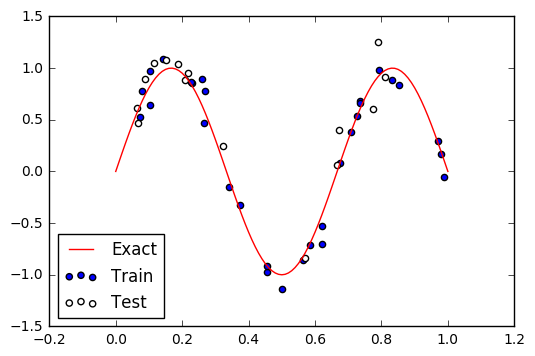

In [3]:
# generate data
n_tr = 30
n_te = int(0.5 * n_tr)
sigma = 0.15

#train data
x_tr = np.random.uniform(size=(n_tr,))
err_tr = np.random.normal(scale=sigma, size=(n_tr,))
y_tr = f(x_tr) + err_tr

#test data
x_te = np.random.uniform(size=(n_te,))
err_te = np.random.normal(scale=sigma, size=(n_te,))
y_te = f(x_te) + err_te

# Exact model point for comparison
xm = np.linspace(0,1,101)
ym = f(xm)

# look at the data and model
scatter(x_tr, y_tr, label='Train')
scatter(x_te, y_te, c='w', label='Test')
plot(xm, ym, c='r', label='Exact')
legend(loc='best')

## Polynomial models

Now move to creating polynomial models of different orders. We set the model order by creating the dataset $X$ containing all the relevant powers of $x$. The following function does exactly this.

In [4]:
def create_powers_data(x, pw):
    """ takes array x, and returns a multicolumn dataframe
    with powers of x from 0 all the way up to pw in columns
    """
    xs = pd.Series(x, name='power_1')
    n = len(x)
    df = pd.DataFrame(np.ones((n,1)), columns=['power_0'])
    if pw > 0:
        for i in range(1, pw+1):
            cln = 'power_{0}'.format(i)
            df[cln] = xs.apply(lambda x: x ** i)
    return df

Import linear regression class

In [5]:
from sklearn.linear_model import LinearRegression
md = LinearRegression()

In [6]:
# create a function for a model of order pw
def fixed_order_func(pw, show_plots=False):
    """ """
    df_tr = create_powers_data(x_tr, pw)
    md.fit(df_tr, y_tr)
    yp_tr = md.predict(df_tr)
    df_te = create_powers_data(x_te, pw)
    yp_te = md.predict(df_te)
    sq0te = np.sqrt(((y_te - yp_te) ** 2).mean())
    sq_te.append(sq0te)
    sq0tr = np.sqrt(((y_tr - yp_tr) ** 2).mean())
    sq_tr.append(sq0tr)
    if show_plots:
        df_tm = create_powers_data(xm, pw)
        ymp = md.predict(df_tm)
        print('order: {0}, training error: {1:6.2f}, test error: {2:6.2f}'.format(pw, sq0tr, sq0te))
        scatter(x_tr, y_tr, label='Train')
        scatter(x_te, y_te, c='w', label='Test')
        plot(xm, ym, c='r', label='Exact')
        plot(xm, ymp, c='g', label='Model')
        legend(loc='best')

### Run all models

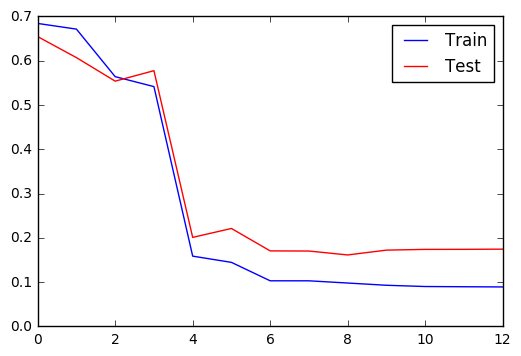

In [7]:
# create RMSE lists
sq_te = list()
sq_tr = list()

# build all the models
for i in range(0, 2 * m + 7):
    fixed_order_func(i)

# plot train and test errors
s_tr = np.array(sq_tr)
s_te = np.array(sq_te)
ind = (s_te <= 2)
plot(s_tr[ind], label='Train')
plot(s_te[ind], 'r', label='Test')
legend(loc='best')

### Plot the data and the best model, according to test error value

The test error varies slowly for orders 4 and greater, so in spite of order 8 being optimal, using order 6 actually descreases overfitting. Denote $s_0,\dots,N$ the sequence of test error values for all model orders from 0 up to $N$, and let
$$N_*=\arg\min_{i=0,\dots,N} {s_i}.$$
We call $\tilde{N}$ the suboptimal order if it equals the minimum order such that the error exceeds the optimum error by at most $100\gamma\%$, where $\gamma$ is a parameter:
$$ \tilde{N} = \min\{i:\, s_i\leq(1+\gamma)s_{N_*}\}. $$

optimal order: 8, suboptimal order 6
order: 6, training error:   0.10, test error:   0.17


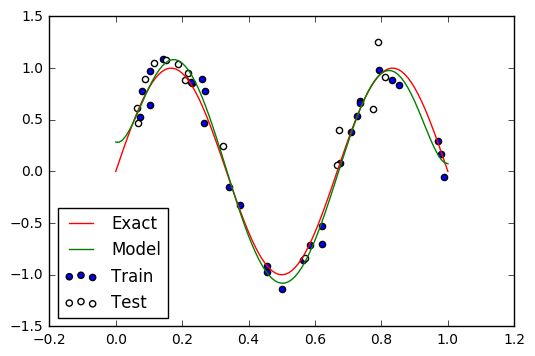

In [8]:
# order of minimum test error
nmb = s_te.argmin()

# minimum order such that the error is greater than optimal by less than 10%
ss = (s_te/s_te[nmb] <= 1.1).nonzero()[0][0]

print('optimal order: {0}, suboptimal order {1}'.format(nmb, ss))

# suboptimal model
fixed_order_func(ss, True)